# Analyzing Factors Affecting Traffic on Interstate 94

The goal of this project is to explore the factors affecting traffic conditions on Interstate 94, specifically a westbound stretch of interstate between Minneapolis and St. Paul.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
#importing data

metro_traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [23]:
#overview of dataset
metro_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [24]:
print(metro_traffic.head(5))
print(metro_traffic.head(-5))

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0        None  288.28     0.00      0.0          40       Clouds   
1        None  289.36     0.00      0.0          75       Clouds   
2        None  289.58     0.00      0.0      

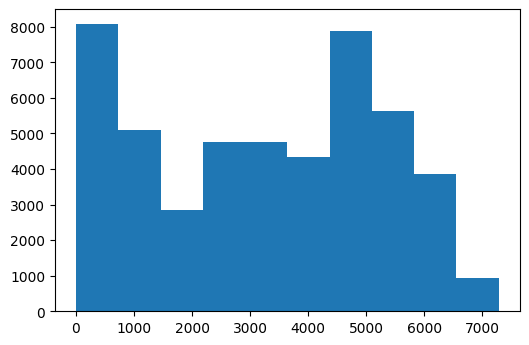

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [25]:
#initial visualizations of distribution
plt.hist(metro_traffic['traffic_volume'])
plt.show()
metro_traffic['traffic_volume'].describe()

According to the data dictionary, the units of the traffic volume are automobiles/hour. While the histogram alone isn't terribly valuable in discerning trends, it does tell us that there are more instances of less than 1000 hourly cars and 4500-5000 hourly cars than any other period. There are seldom more than 6500 hourly cars. Many of the other bins are roughly in the same ballpark. 

I suspect the traffic volume is closely related to time of day, though the histogram above does not lend insight into this hypothesis.

## Time of Day Analysis

In [47]:
#converting date-time column to datetime class
metro_traffic['date_time'] = pd.to_datetime(metro_traffic['date_time'])

#determining hourly information using converted date-time column
metro_traffic['date_time'].dt.hour

#separating daytime and nighttime data. I'm going to split this at
#7:00 am and 7:00 pm to better reflect actual driving
#experiences. To split this dataset, I first create 
#boolean masks for the daytime and nighttime hours.

nighttime_bool = ((metro_traffic['date_time'].dt.hour <= 7) | (metro_traffic['date_time'].dt.hour> 19))
daytime_bool = ((metro_traffic['date_time'].dt.hour > 7) & (metro_traffic['date_time'].dt.hour <= 19))

night_hours = metro_traffic['date_time'][nighttime_bool]
day_hours = metro_traffic['date_time'][daytime_bool]

night_traffic = metro_traffic[nighttime_bool]
day_traffic = metro_traffic[daytime_bool]


Now, I'm going to plot histograms for newly split nightly and daily traffic. See below.

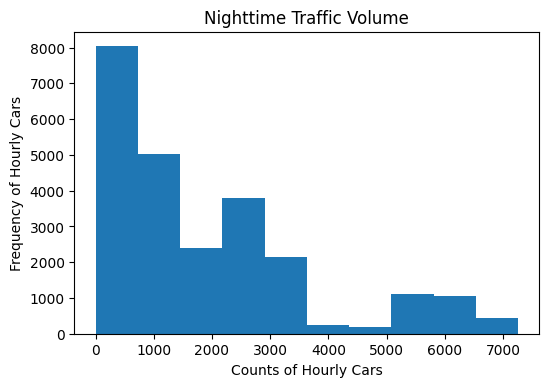

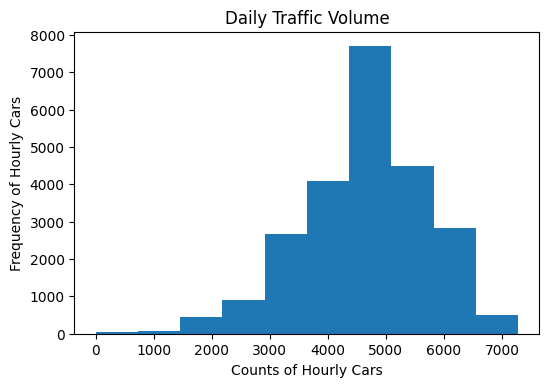

count    24445.000000
mean      1917.067089
std       1736.799020
min          0.000000
25%        532.000000
50%       1242.000000
75%       2772.000000
max       7260.000000
Name: traffic_volume, dtype: float64

count    23759.00000
mean      4641.33924
std       1068.65102
min          0.00000
25%       4049.00000
50%       4708.00000
75%       5337.00000
max       7280.00000
Name: traffic_volume, dtype: float64


In [59]:
plt.hist(night_traffic['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Counts of Hourly Cars')
plt.ylabel('Frequency of Hourly Cars')
plt.show()
plt.hist(day_traffic['traffic_volume'])
plt.title('Daily Traffic Volume')
plt.xlabel('Counts of Hourly Cars')
plt.ylabel('Frequency of Hourly Cars')
plt.show()

print(night_traffic['traffic_volume'].describe())
print()
print(day_traffic['traffic_volume'].describe())

As we can see above, the daily traffic volume has a relatively normal distrbution that is slightly left skewed. Most observations for daily hours where in the range of 4500-5000 cars per hour.

The nightly traffic volume distribution is far less normal and is very right skewed. The majority of observations saw less than 1500 cars per hour. This makes sense: we would expect that there would be fewer cars on the road during the night. 

Given that we're interested in looking at factors affecting traffic, the nightly data is likely not pertinent. I believe we can exclude it from our analysis. 

## Analysis by Month

In [60]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-60-232974b20408>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4379.382785
2     4577.445087
3     4755.891671
4     4742.272508
5     4769.600454
6     4787.214477
7     4494.121650
8     4799.611891
9     4745.968382
10    4812.563146
11    4574.138274
12    4313.228426
Name: traffic_volume, dtype: float64

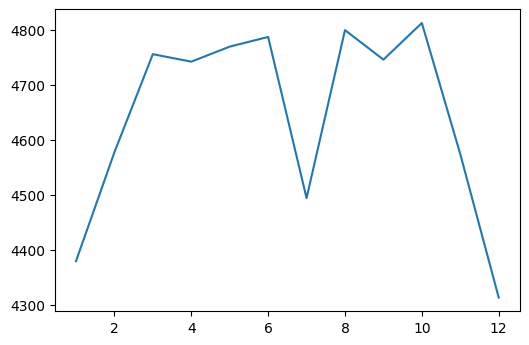

In [66]:
plt.plot(by_month['traffic_volume'])

Based on the graph above, the months for lowest average car volumes are the winter and late fall months and also July. I imagine the big dip in July may have something to do with summer vacations. 

The other months are surprisingly stable in volume. 

## Analysis by Day of Week

In [69]:
day_traffic['dayofweek'] = day_traffic['date_time'].dt.dayofweek
by_dayofweek = day_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']
# 0 is Monday, 6 is Sunday

<ipython-input-69-3c433372fc55>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4654.143222
1    4949.945727
2    5058.010219
3    5075.290639
4    5085.229148
5    4056.587118
6    3606.582789
Name: traffic_volume, dtype: float64

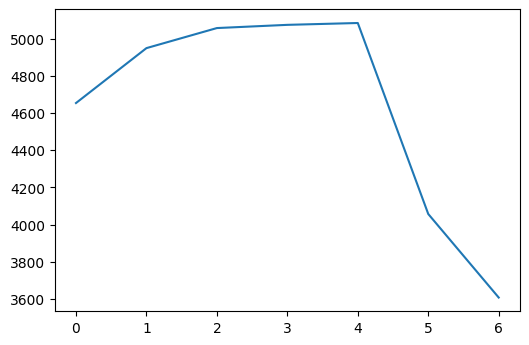

In [70]:
plt.plot(by_dayofweek['traffic_volume'])

As we would expect, traffic gnerally follows the American work week, though there are some interesting tweaks here. We can see that traffic falls off dramatically on Friday and then slightly more on Saturday. It returns to near-work week levels on Sunday. Monday through Thursday volumes are roughly equivalent.

Now, I'll get a little more granular by looking at individual days of the week.

In [72]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour
bussiness_days = day_traffic.copy()[day_traffic['dayofweek'] <= 4] # 4 == Friday
weekend = day_traffic.copy()[day_traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-72-b2a7dc28ffc0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



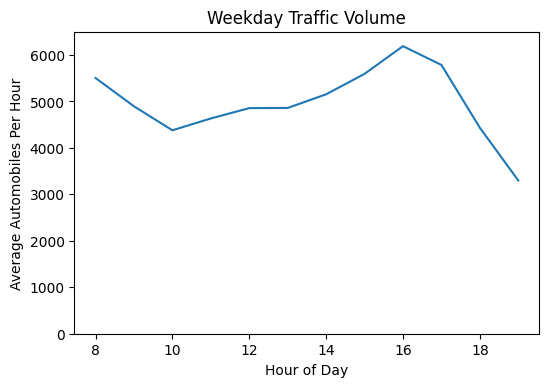

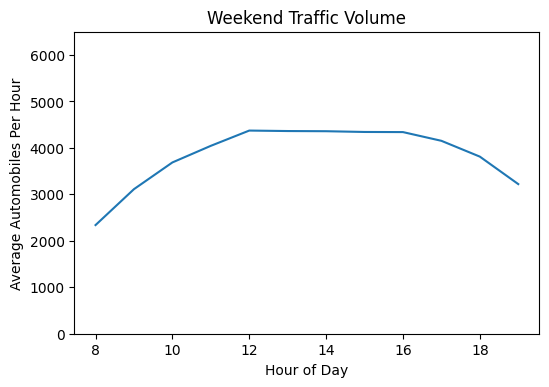

In [76]:
plt.plot(by_hour_business['traffic_volume'])
plt.title('Weekday Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Average Automobiles Per Hour')
plt.ylim(0,6500)
plt.show()

plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend Traffic Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Average Automobiles Per Hour')
plt.ylim(0,6500)
plt.show()


As we would expect, weekday traffic roughly traffics the work day schedule, with peaks shortly before the 9:00 am start time and then after the end of the work day at 5:00 pm. What's perhaps surprising is that the volumes don't drop off that dramatically between 10:00am and 2:00pm. We do see a more dramatic dropoff after about 6:00 pm or so.

During ther weekend, the pattern is in some ways opposite of those seen in the weekday. Traffic levels rise between 8:00 and 11:00 am, which reflects people running errands after slower starts in the day. Volumes hold roughly steady until approximately 5:00, after which time people are starting to return home from a day or errands outside.

## Analysis by Specific Weather Condition

Now I'm going to look at the correlations between traffic volume and the various weather conditions measured by the dataset.

In [97]:
# First looking at correlations between rain/snow and 
# traffic volume

print(day_traffic['traffic_volume'].corr(day_traffic['snow_1h']))
print(day_traffic['traffic_volume'].corr(day_traffic['rain_1h']))

0.005186245966641658
0.005001370105267594


Surprisingly, rain and snow on the hourly level has almost no relationship with traffic volume. Below, I list Pearson coefficients for all variables in the dataset to determine the variable with the strongest correlation with traffic volume. I then create a scatterplot for the most highly correlated variable against traffic volume.

In [98]:
day_traffic.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
temp,1.000000,0.010519,-0.019889,-0.156597,0.133283,0.216917,0.002207,0.129902
rain_1h,0.010519,1.000000,-0.000086,0.004875,0.005001,0.001162,-0.009854,0.006581
snow_1h,-0.019889,-0.000086,1.000000,0.027333,0.005186,0.026034,-0.008344,-0.003596
clouds_all,-0.156597,0.004875,0.027333,1.000000,-0.037828,0.000447,-0.044472,0.008198
traffic_volume,0.133283,0.005001,0.005186,-0.037828,1.000000,-0.012350,-0.324395,0.004045
month,0.216917,0.001162,0.026034,0.000447,-0.012350,1.000000,0.013141,0.001215
dayofweek,0.002207,-0.009854,-0.008344,-0.044472,-0.324395,0.013141,1.000000,-0.001457
hour,0.129902,0.006581,-0.003596,0.008198,0.004045,0.001215,-0.001457,1.000000


Again, somewhat surprisngly, temperature is the weather variable with the strongest correlation to traffic volume. See a plot of this below. However, the correlation is still quite weak between these two variables.

In [105]:
day_traffic['temp'].head(10)

0    288.28
1    289.36
2    289.58
3    290.13
4    291.14
5    291.72
6    293.17
7    293.86
8    294.14
9    293.10
Name: temp, dtype: float64

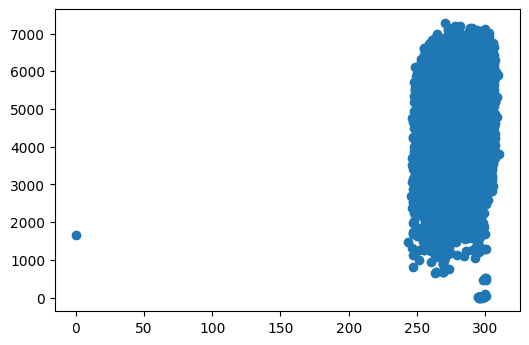

In [106]:
plt.scatter(day_traffic['temp'], day_traffic['traffic_volume'])
plt.show()

Based on the above graph, it would seem that the minor correlation between traffic volume and temperature is at least partly informed by an outlier temperature reading(s) (likely errors). If we set the window smaller, we lack of correlation appears even more clearly:

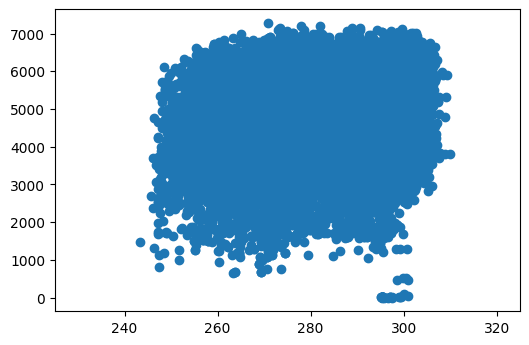

In [107]:
plt.scatter(day_traffic['temp'], day_traffic['traffic_volume'])
plt.xlim(225,325)
plt.show()

As we can see above, there is really no correlation at all between these two variables. 

Given that temperature was the variable with the strongest correlation with traffic volume, we can safely conclude that, in this dataset, weather has almost no bearing whatsoever on traffic volume.

## Analysis by Weather Main and Description

Next, I'll see if there are any meaningful trends to be found in the weather_main and weather_description variables vis-a-vis traffic volume.

In [116]:
by_weather_main.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,284.515297,0.000000,0.000000,1.672533,4662.582471,6.501553,3.144928,13.446860
Clouds,283.372306,0.000000,0.000000,62.623099,4744.546704,6.402254,2.998986,13.791887
Drizzle,284.413643,0.165659,0.000000,84.980527,4694.158076,7.105384,2.912944,13.386025
Fog,276.043684,0.198140,0.001789,74.347368,4136.673684,6.575439,2.778947,11.814035
Haze,275.958971,0.062703,0.000000,64.326555,4549.198565,5.912679,2.736842,13.057416


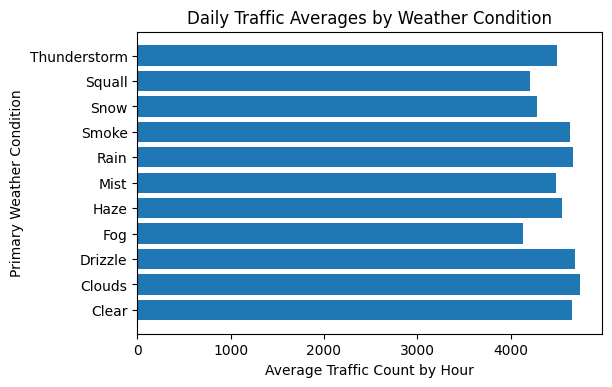

In [124]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_description = day_traffic.groupby('weather_description').mean()
plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.title("Daily Traffic Averages by Weather Condition")
plt.xlabel("Average Traffic Count by Hour")
plt.ylabel("Primary Weather Condition")
plt.show()

It doesn't seem as though there was any primary condition that, on average, produced significantly more traffic than any other primary condiiton. Now I'll look at weather_description to check that variable.

In [125]:
by_weather_description.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.0,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,294.056878,0.000000,0.0,0.000000,4790.586166,7.562720,2.886284,13.487691
broken clouds,282.754388,0.000000,0.0,72.649104,4716.012645,6.660695,2.980681,13.619951
drizzle,283.669784,0.128058,0.0,89.107914,4525.467626,7.269784,2.992806,13.122302
few clouds,285.103034,0.000000,0.0,19.362931,4732.974138,6.181034,2.963793,13.606034


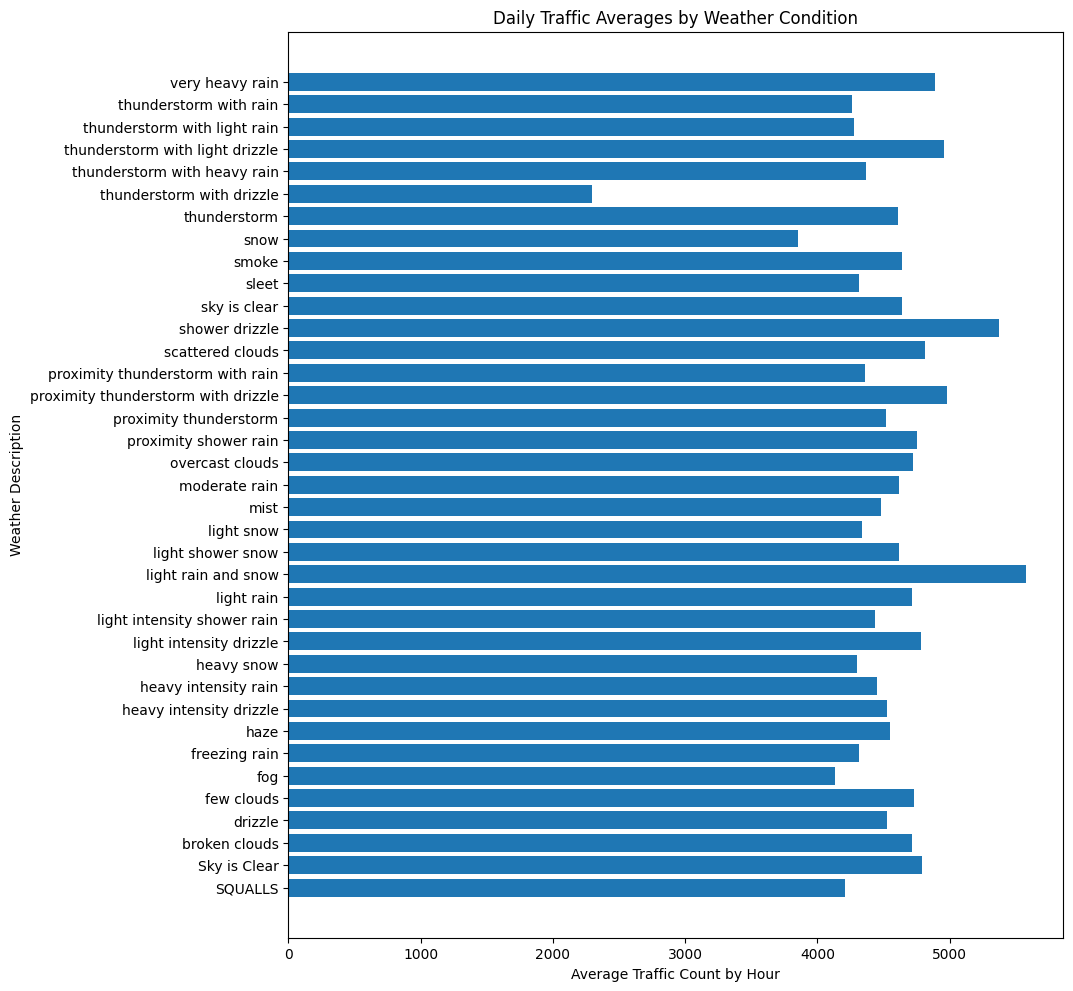

In [138]:
plt.figure(figsize=(10,12))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.title("Daily Traffic Averages by Weather Condition")
plt.xlabel("Average Traffic Count by Hour")
plt.ylabel("Weather Description")
plt.show()

There are a couple of weather descriptions associated with higher traffic (>5000 hourly cars): "light rain and snow" and "shower drizzle".

# Summary

In closing, there are few variables in the dataset that correlate strongly with higher traffic volumes. Some weather conditions are more associated with higher traffic ("light rain and snow" and "shower drizzle"), but even these do not produce dramatically poorer traffic conditions. By far the best condition for traffic is "thunderstorm with drizzle" but I don't know if I would recommend seeking out those driving conditions.